<a href="https://www.kaggle.com/code/vanitech8/paris-2024-olympics-medals?scriptVersionId=197934608" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympics-medals/olympics2024.csv
/kaggle/input/paris-2024-olympic-medal/other/default/1/olympics2024.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv('/kaggle/input/paris-2024-olympics-medals/olympics2024.csv')

In [4]:
df.isna().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [5]:
df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [8]:
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [9]:
df.nunique()

Rank            63
Country         91
Country Code    91
Gold            18
Silver          16
Bronze          19
Total           27
dtype: int64

In [10]:
df.shape

(91, 7)

In [11]:
df['Country'].value_counts().sum()

91

In [12]:
df.groupby(['Country Code'])['Gold'].value_counts()

Country Code  Gold
ALB           0       1
ALG           2       1
ARG           1       1
ARM           0       1
AUS           18      1
                     ..
UGA           1       1
UKR           3       1
US            40      1
UZB           8       1
ZAM           0       1
Name: count, Length: 91, dtype: int64

In [13]:
df.groupby(['Country Code'])['Silver'].value_counts()

Country Code  Silver
ALB           0         1
ALG           0         1
ARG           1         1
ARM           3         1
AUS           19        1
                       ..
UGA           1         1
UKR           5         1
US            44        1
UZB           2         1
ZAM           0         1
Name: count, Length: 91, dtype: int64

In [14]:
df.groupby(['Country Code'])['Bronze'].value_counts()

Country Code  Bronze
ALB           2         1
ALG           1         1
ARG           1         1
ARM           1         1
AUS           16        1
                       ..
UGA           0         1
UKR           4         1
US            42        1
UZB           3         1
ZAM           1         1
Name: count, Length: 91, dtype: int64

In [15]:
gold=df[df['Gold']>3.6]
gold

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


In [16]:
silver=df[df['Silver']>3.59]
silver

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


In [17]:
bronze=df[df['Bronze']>4.2]
bronze

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


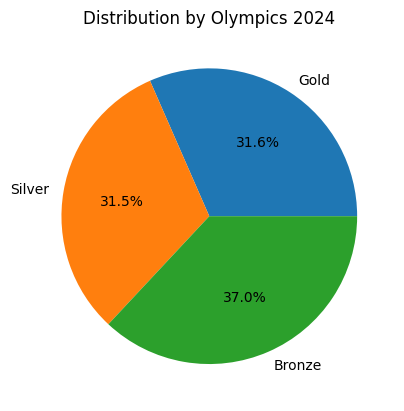

In [18]:
medal_counts = [df['Gold'].sum(),df['Silver'].sum(),df['Bronze'].sum()]
medal_labels = ['Gold','Silver','Bronze']
plt.pie(medal_counts,labels=medal_labels,autopct='%1.1f%%')
plt.title('Distribution by Olympics 2024')
plt.show()

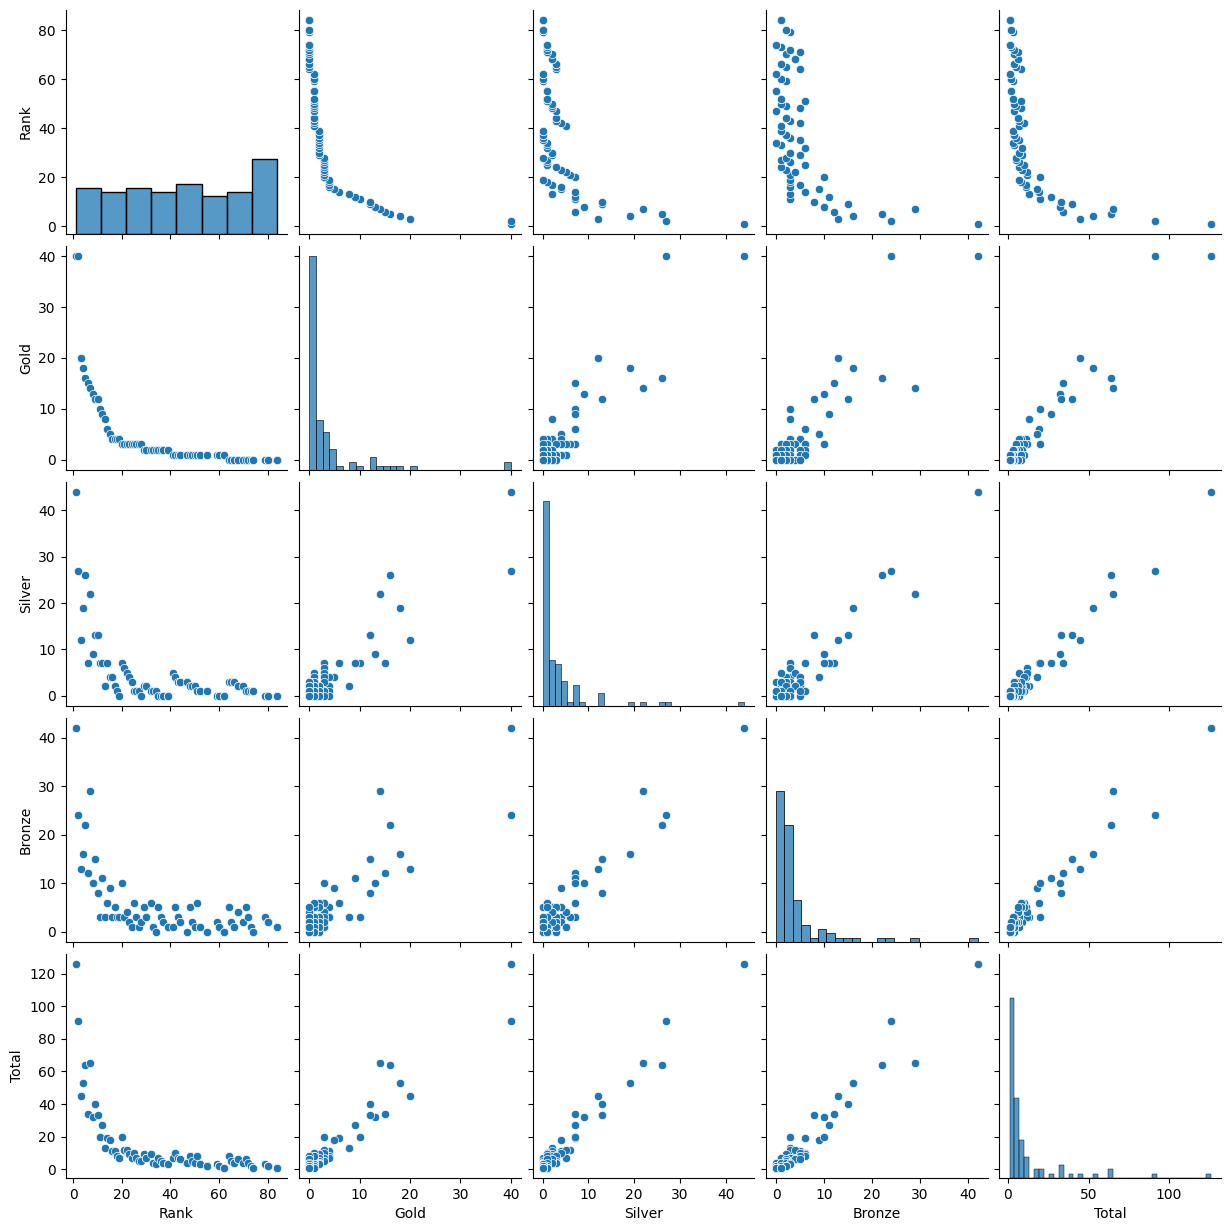

In [19]:
sns.pairplot(df)

In [20]:
len(df['Rank'][ df['Gold']!= 0])

63

In [21]:
len(df['Rank'][ df['Silver']== 0])

26

In [22]:
len(df['Rank'][ df['Bronze']== 0])

13

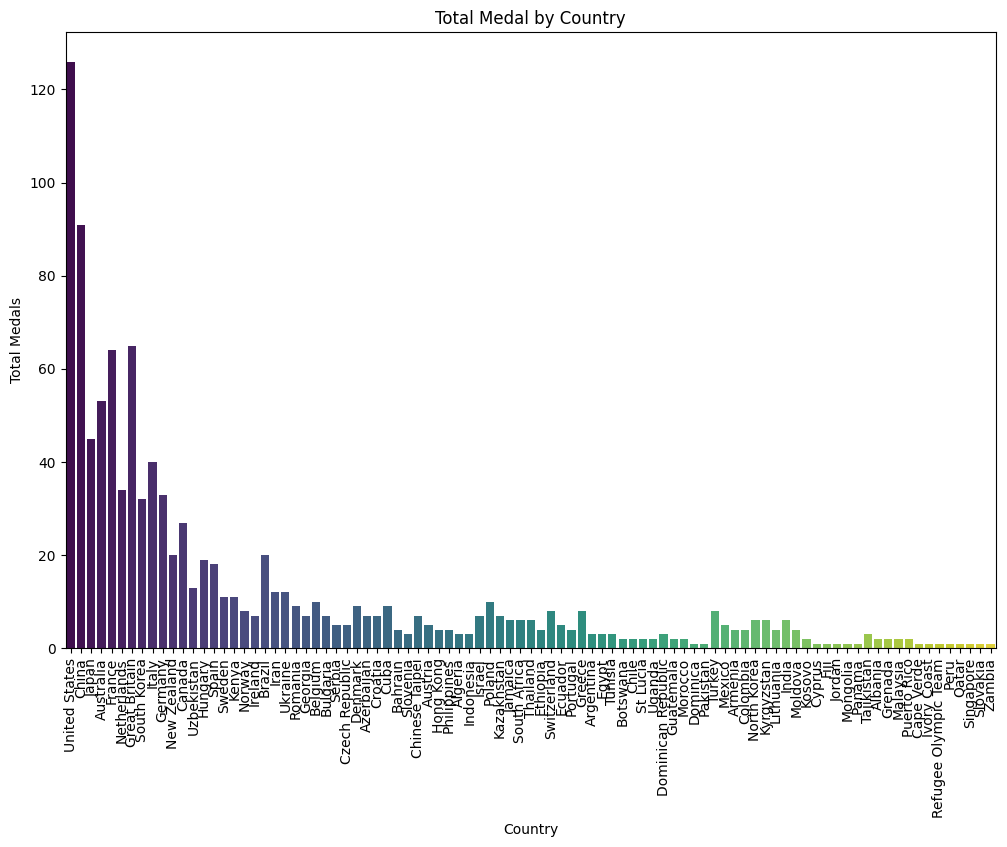

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Country', y='Total', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Medal by Country')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

Explanation:

1.Import necessary libraries: Import Pandas, NumPy, Seaborn, and Matplotlib for data manipulation, numerical operations, data visualization, and plotting, respectively.

2.Load CSV data: Use Pandas' read_csv() function to load the CSV file into a DataFrame named data.

3.Explore the data: Use functions like head(), info(), and describe() to get an overview of the data, including column names, data types, and summary statistics.

4.Handle missing values (if needed): If your data contains missing values, you can use techniques like filling with a specific value or using interpolation methods (e.g., fillna()).

5.Analyze specific columns or perform calculations: Perform calculations or aggregations on specific columns to extract meaningful insights. In this example, we calculate the total medals per country.

6.Visualize the data: Use Seaborn and Matplotlib to create various visualizations, such as bar plots, histograms, scatter plots, etc. Customize the plots to suit your project requirements.